In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re

In [3]:
# Read the CSV file
df = pd.read_csv('../../data/row/unbalanced_brad.csv')
# Initialize dictionary to store results
results = {}

In [4]:
# 1. Dataset shape
results['shape'] = df.shape
print("Dataset shape:", df.shape)

Dataset shape: (510599, 6)


In [5]:
# 2. First few rows
results['head'] = df.head().to_dict()
print("\nFirst few rows:")
print(df.head())


First few rows:
   Unnamed: 0  rating   review_id   book_id   user_id  \
0           0       4  1682581870  57098525  13637412   
1           1       5  1682385404  56693085  13637412   
2           2       4  1682039752  30836455  13637412   
3           3       5  1681553886   6680940  13637412   
4           4       3  1681248984  19011044  13637412   

                                              review  
0  صراع الجذور والانتماء، عقلة ساق الخيزان توائم ...  
1  كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...  
2  رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...  
3  رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...  
4  هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...  


In [6]:
# 3. Data types
results['dtypes'] = df.dtypes.to_dict()
print("\nData types:")
print(df.dtypes)


Data types:
Unnamed: 0     int64
rating         int64
review_id      int64
book_id        int64
user_id        int64
review        object
dtype: object


In [7]:
# 4. Missing values
results['missing_values'] = df.isnull().sum().to_dict()
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0    0
rating        0
review_id     0
book_id       0
user_id       0
review        0
dtype: int64


In [8]:
# 5. Summary statistics
results['describe'] = df.describe(include='all').to_dict()
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
           Unnamed: 0         rating     review_id       book_id  \
count   510599.000000  510599.000000  5.105990e+05  5.105990e+05   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean    255299.000000       3.749667  8.812241e+08  1.634675e+07   
std     147397.379386       1.180463  4.237839e+08  1.195902e+07   
min          0.000000       1.000000  3.632700e+05  8.324000e+03   
25%     127649.500000       3.000000  5.439148e+08  6.532272e+06   
50%     255299.000000       4.000000  8.728007e+08  1.332966e+07   
75%     382948.500000       5.000000  1.222588e+09  2.325831e+07   
max     510598.000000       5.000000  1.683986e+09  5.724964e+07   

             user_id  review  
count   5.105990e+05  510599  
unique           NaN  504007  
top              NaN   رائعة  
freq             NaN     272  
mean   

In [9]:
# 6. Rating distribution
results['rating_distribution'] = df['rating'].value_counts().to_dict()
print("\nRating distribution:")
print(df['rating'].value_counts())


Rating distribution:
rating
5    166972
4    158462
3    106785
2     47133
1     31247
Name: count, dtype: int64


In [10]:
# 7. Review length
df['review_length'] = df['review'].astype(str).apply(len)
results['review_length_stats'] = df['review_length'].describe().to_dict()
print("\nReview length statistics:")
print(df['review_length'].describe())


Review length statistics:
count    510599.000000
mean        420.244530
std         665.372254
min           1.000000
25%          89.000000
50%         214.000000
75%         478.000000
max        8192.000000
Name: review_length, dtype: float64


In [11]:
# 8. Word count in reviews
df['word_count'] = df['review'].astype(str).apply(lambda x: len(re.findall(r'\w+', x)))
results['word_count_stats'] = df['word_count'].describe().to_dict()
print("\nWord count statistics:")
print(df['word_count'].describe())


Word count statistics:
count    510599.000000
mean         75.556609
std         119.366533
min           0.000000
25%          16.000000
50%          38.000000
75%          86.000000
max        2379.000000
Name: word_count, dtype: float64


In [12]:
# 9. Unique values in columns
results['unique_values'] = {
    'review_id': df['review_id'].nunique(),
    'book_id': df['book_id'].nunique(),
    'user_id': df['user_id'].nunique()
}
print("\nUnique values:")
print(f"Review IDs: {df['review_id'].nunique()}")
print(f"Book IDs: {df['book_id'].nunique()}")
print(f"User IDs: {df['user_id'].nunique()}")


Unique values:
Review IDs: 510599
Book IDs: 76530
User IDs: 4993


In [13]:
# 10. Most frequent words in reviews
all_words = ' '.join(df['review'].astype(str)).split()
word_freq = Counter(all_words)
results['most_frequent_words'] = dict(word_freq.most_common(10))
print("\nMost frequent words:")
print(word_freq.most_common(10))


Most frequent words:
[('من', 921224), ('في', 833417), ('و', 760212), ('..', 369015), ('على', 344990), ('أن', 311223), ('لا', 290681), ('عن', 285618), ('ما', 284969), ('،', 262673)]


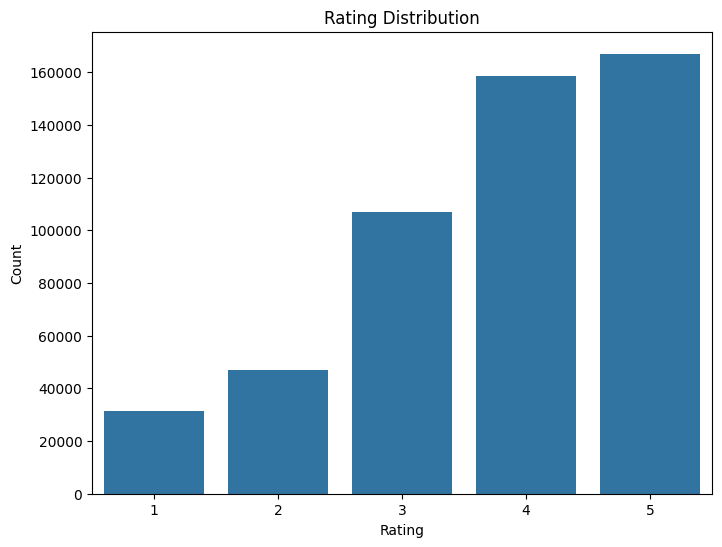

In [18]:
# 11. Plot rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
plt.close()

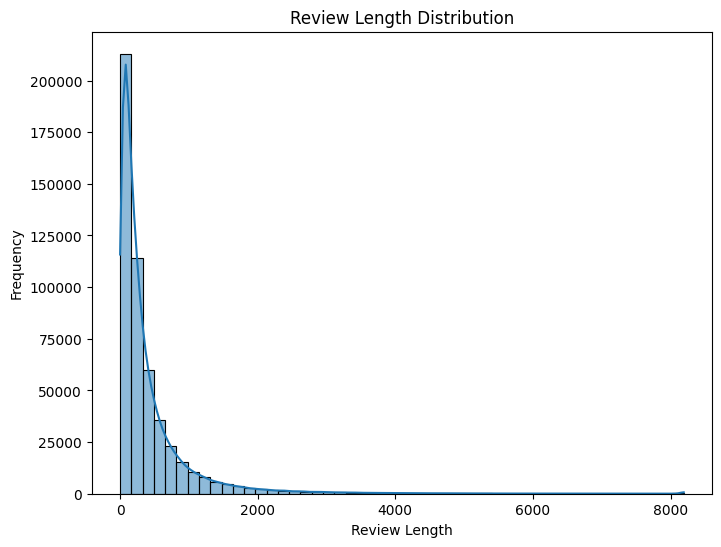

In [16]:
# 12. Plot review length distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()
plt.close()

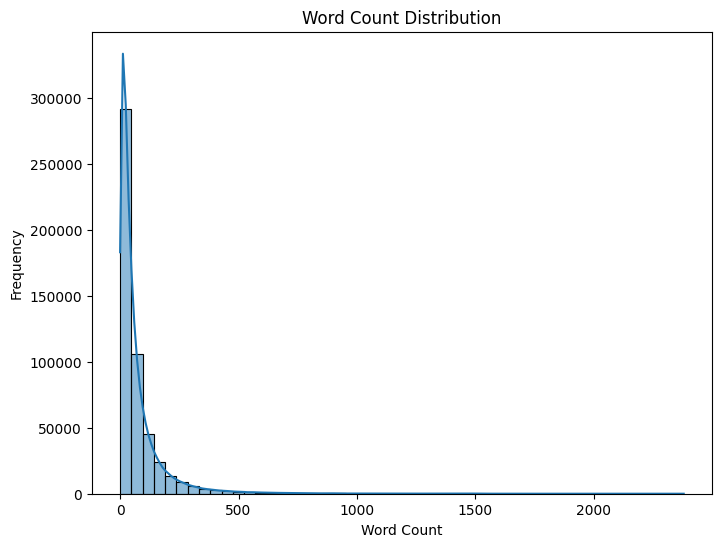

In [17]:
# 13. Plot word count distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()
plt.close()

In [19]:
# 14. Save results to a .txt file
with open('data_exploration_results.txt', 'w') as f:
    for key, value in results.items():
        f.write(f"{key}: {value}\n")

print("\nAll results saved to 'data_exploration_results.txt'")


All results saved to 'data_exploration_results.txt'
